Lien vers le sujet https://www.doc-solus.fr/prepa/sci/adc/bin/view.corrige.html?q=PSI_PHYSIQUE_CENTRALE_2_2016

Bibliographie sur la loi de refroidissement de Newton : 

- Besson, Ugo. « The History of the Cooling Law: When the Search for Simplicity Can Be an Obstacle ». Science & Education 21, nᵒ 8 (août 2012): 1085‑1110. https://doi.org/10.1007/s11191-010-9324-1.


# II De la cuisson des oeufs 

## II A chauffage de l'eau 

### II A 1

L'énergie thermique de la résistance est fournie au système qui comprend :

- l'eau
- la structure du cuiseur
- l'oeuf ou les oeufs présents

Dans la première phase de chauffage, on peut supposer que les oeufs ne sont pas chauffés du tout car ils sont au-dessus de l'eau. Le système chauffé dans la première phase est donc seulement constitué de l'eau et du cuiseur, que le sujet propose de représenter via la notion de *valeur en eau* $m_c$.

On peut donc écrire que la puissance électrique devient chaleur et est intégralement transférée au système (car les échanges sont considérés adiabatiques, donc pas de pertes externes) :

$$
\Delta Q_{th} = \mathscr{P} \Delta t_1 = \Delta e_{int} = (m_c + m_0) c (T_{eb} - T_0)
$$

On en déduit : 

$$
\Delta t_1 = (m_c + m_0) c (T_{eb} - T_0) / \mathscr{P}
$$

### II A 2 (détermination de la valeur en eau)

La connaissance du temps de chauffage à vide $\Delta t_0$ nous permet d'écrire la chose suivante :

$$
\Delta t_0 = (m_c + m_0) c (T_{eb} - T_0) / \mathscr{P}
$$

On en déduit la valeur en eau du cuiseur : 
$$
m_c = \frac{ \mathscr{P} \Delta t_0 }{ c (T_{eb} - T_0) }  -  m_0 
$$

Application numérique : 

In [1]:
P = 350 # W
delta_t0 = 150 # s
m_0 = 150 # g
c = 4.18 # J / g / K
T_eb = 100 # °C
T_0 = 20 # °C

m_c = P * delta_t0 / (c * (T_eb - T_0)) - m_0

print(f"m_c: {m_c:.2f} g")

## II B détermination de la durée de cuisson $\Delta t_2$

### II B 1 (fonction de la pique)

Je ne comprends pas bien les explications sur la pique. Le raisonnement pourrait être qu'on perce les coquilles pour permettre aux oeufs de cuire le plus lentement possible dans le but de perdre le moins d'eau possible. 

Ou alors de permettre à la vapeur d'eau d'aller au plus proche de l'intérieur de la coquille (on fait des trous après avoir mis les oeufs dans le récipient).

Ou alors d'éviter que les oeufs explosent à cause de la surpression d'air chauffé à l'intérieur ? 

### II B 2 (équation de la chaleur pour l'oeuf sphérique)

Hypothèses : l'oeuf est sphérique de rayon $r_2$, entièrement constitué d'eau. 

**(a) bilan énergétique sur une couche sphérique**

Volume d'une couche sphérique de rayon $r$ et d'épaisseur $dr$ (développement limité) : 

$$
V \approx 4 \pi r^2 dr
$$

La variation d'énergie interne dans la couche pendant un instant $dt$ est 

$$
\Delta e|_t^{t+dt} = \mu V c \frac{ \partial T }{ \partial t } dt
$$

Cette variation d'énergie interne vient de la chaleur qui a été transférée par conduction entre les deux couches au-dessus et en dessous. On peut donc écrire ceci, en notant $j(r, t) \vec{e}_r$ le vecteur flux surfacique de chaleur :

$$
\Delta e|_t^{t+dt} = -\frac{\partial}{\partial r}\left ( 4 \pi r^2 j(r, t) \right ) dr dt
$$


**Note :** on a fait l'hypothèse que le champ de température ne dépendait que de $r$, mais des angles sphériques, dans la mesure où on considère que la chaleur diffuse de l'extérieur vers l'intérieur de l'oeuf de manière isotrope.

En égalisant les deux termes et en simplifiant, on obtient :

$$
\mu r^2 c \frac{ \partial T }{ \partial t } = - \frac{\partial r^2 j(r, t)}{\partial r}
$$

En introduisant le loi de Fourier $j_{th}(r,t) = - \lambda \partial T(r, t) / \partial r$, on obtient 

$$
\mu r^2 c \frac{ \partial T }{ \partial t } = \lambda \frac{\partial}{\partial r} \left ( r^2 \frac{\partial T}{\partial r} \right )
$$

**(b) introduction de variables réduites**

En introduisant les variables réduites $\rho= r / r_2$ et $\tau = t / \theta$ l'équation précédente devient : 

$$
\frac{r_2^2 \mu c }{\lambda \theta} \frac{\partial T}{\partial \tau} = \frac{1}{\rho^2} \frac{\partial}{\partial \rho} \left ( \rho^2 \frac{ \partial T }{ \partial \rho }\right )
$$

On en déduit

$$
\theta = \frac{ r_2^2 \mu c }{\lambda }
$$

ce qui nous permet d'obtenir la forme voulue par l'énoncé de l'équation de la chaleur


$$
 \frac{\partial T}{\partial \tau} = \frac{1}{\rho^2} \frac{\partial}{\partial \rho} \left ( \rho^2 \frac{ \partial T }{ \partial \rho }\right )
$$

Commentaire sur la dépendance en $r^2$ de $\theta$ : on retrouve le fait que la diffusion thermique ralentit de plus en plus au fur et à mesure de la distance parcourue (je pense à $t = L^2 / (4 D)$, dont la formule ci-dessus est l'analogue). Si on le dit à l'envers : le fait d'avoir un temps de diffusion proportionnel à la distance au carré montre que la longueur diffusée croît en racine de t, ce qui est l'une des solutions classiques de l'équation de la chaleur.

### II B 3 (résolution de l'équation de la chaleur avec dépendance en temps)

**(a) partie temporelle**

En injectant la forme de solution à variables séparées dans l'équation de la chaleur, on obtient :

$$
\frac{g'}{g} = \frac{1}{f} (\frac{2}{\rho} f' + f'')
$$

Le terme de gauche ne dépend que du temps $\tau$ alors que le terme de droite ne dépend que de l'espace $\rho$. On peut donc dire que c'est une constante. 

Concernant la partie temporelle, si la constante est positive, alors on a une solution en exponentielle croissante. Etant donné que ce n'est pas physique, la constante doit être négative. Et donc on peut écrire :

$$
\frac{1}{g(\tau)} \frac{d g(\tau)}{d\tau} = - A^2,
$$

avec $A > 0$.

On en déduit que $g(\tau)$ s'écrit 

$$
g(\tau) = C_\tau \exp(-A^2 \tau)
$$

**(b) partie spatiale**

Après avoir remplacé $f(\rho) = \frac{F(\rho)}{\rho}$ dans l'équation différentielle, on obtient :

$$
\frac{ d^2 F(\rho) }{ d^2 \rho } + A^2 F(\rho) = 0
$$


C'est une équation différentielle linéaire à coefficients réels constants d'ordre 2 mais que l'on connaît bien : l'équation de l'oscillateur harmonique.

(pour le cas général voir https://fr.wikipedia.org/wiki/%C3%89quation_diff%C3%A9rentielle_lin%C3%A9aire_d'ordre_deux#Cas_r%C3%A9el)

La solution s'écrit 

$$
F(\rho)=C_1\cos(A\rho)+C_2\sin(A\rho)
$$

On en déduit 


$$
f(\rho) = \frac{F(\rho)}{\rho} = C_1 / \rho \cos(A\rho)+C_2 / \rho \sin(A\rho)
$$

On peut noter que l'on cherche une solution valable pour $\rho$ entre 0 et 1. 

Etant donné que 

$$\lim_{\rho\rightarrow 0} \frac{ \cos(A \rho)} { \rho }=  +\infty,$$

on en déduit que $C_1 = 0$.

**(c) solution générale**

Finalement, on obtient la solution générale $T(\rho, \tau) = T_{eb} + f(\rho) g(\tau)$ :

$$
T(\rho, \tau) = T_{eb} + \frac{C_2 }{\rho}  \sin(A\rho) C_\tau \exp(-A^2 \tau)
$$

ou encore 
$$
T(\rho, \tau) = T_{eb} + \frac{C_2' }{\rho}  \sin(A\rho) \exp(-A^2 \tau)
$$

Cette solution est valable pour n'importe quelle valeur de $A$ strictement positive. On en déduit, par le théorème de superposition que les solutions de la forme suivante sont valables :
$$
T(\rho, \tau) = T_{eb} +  \sum_i \frac{\beta_i \sin(A_i\rho)}{\rho}   \exp(-A_i^2 \tau).
$$


On devrait logiquement obtenir les bons coefficients $\beta_i$ en utilisant les conditions aux limites et initiales.

Ce sont : 

- $T(\rho, 0) = T_0$ car l'oeuf démarre à température ambiante qui à ce moment là est la température $T_0$ dans la cloche (on suppose que jusque là il n'y a pas eu de vapeur produite et donc pas de transfert de chaleur).
- $y(T, T', T'')(1, \tau) = 0$ la condition aux limites sur le bord externe pour la cuisson de l'oeuf 

### II B 4 (détermination des constantes dans l'approximation de Fourier)

Dans l'approximation de Fourier, on ne garde qu'une seule "harmonique" de la solution complète, celle avec le plus petit $A$ (et qui décroît donc le moins vite).

$$
T(\rho, \tau) \approx T_{eb} + \frac{\beta \sin(A\rho)}{\rho}   \exp(-A^2 \tau)
$$

**(a) flux entrant**

Le flux de chaleur à la surface de l'oeuf est égal à 

$$
\vec{j}_{th} \cdot \vec{u}_r = h \left( T\left(\rho=1, \tau\right) - T_{eb} \right) = h\beta \sin{A} \exp(-A^2\tau)
$$

Or, on peut aussi calculer ce flux de chaleur grâce à la loi de Fourier $j_{th}(r,t) = - \lambda \partial T(r, t) / \partial r$

Autrement dit, en utilisant la solution approchée du champ de température on peut évaluer cette expression et trouver 

$$
\delta Q / \delta t = - \lambda \partial T(r, t) / \partial r = - \lambda \frac{\partial T(\rho = 1, \tau)} { \partial \rho} \frac{\partial \rho}{\partial r} = -\frac{\lambda \beta \exp(-A^2 \tau)}{r_2} \left ( A \cos{A} - \sin{A}\right )
$$

En égalisant ces deux expressions, on obtient bien l'expression demandée :

$$
\tan{A} = \frac{A}{1 - \frac{r_2 h}{\lambda}}
$$

On peut traçer cette "relation de dispersion" qui fixe les valeurs possibles de A.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from ipywidgets import interact

In [3]:
@interact(r2=(0.001, 0.05, 0.001), h=(0, 2400, 100), lambd=(0.01, 1.2, 0.01))
def surface_relation(r2=0.025, h=1200, lambd=0.6):
    A = np.linspace(0, 10, num=500)
    fig, ax = plt.subplots()
    ax.plot(A, np.tan(A) - A / (1 - r2 * h / lambd), label=r'$\tan{A} - \frac{A}{1 - \frac{r_2 h}{\lambda}}$')
    ax.plot(A, A / (1 - r2 * h / lambd), label=r'$\frac{A}{1 - \frac{r_2 h}{\lambda}}$')
    ax.plot(A, np.zeros_like(A))
    ax.set_ylim(-2, 2)
    ax.vlines(np.pi, -10, 10, label='approx. solution')
    ax.set_xlabel('$A$')
    ax.legend()

interactive(children=(FloatSlider(value=0.025, description='r2', max=0.05, min=0.001, step=0.001), IntSlider(v…

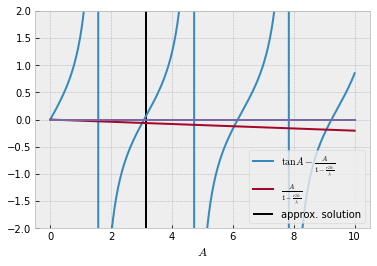

In [4]:
surface_relation()

**(b) solution approchée**

Si $r_2 = 0.025 m$ alors on cherche une solution de $\tan A \approx 0^-$ car la partie droite vaut alors : 

In [5]:
1/ (1 - 0.025 * 1200 / 0.6)

-0.02040816326530612

Dans ce cas-là on peut donc prendre $A\approx \pi$. L'erreur commise s'obtient en posant $A = \pi + \varepsilon$ et en faisant un développement limité autour de $\pi$:



$$
\tan(x) \approx (x - π) + 1/3 (x - π)^3 + 2/15 (x - π)^5 + O((x - π)^7)
$$

Autrement dit $\tan A \approx \varepsilon$.

Si on égalise avec l'autre côté de l'équation, on obtient finalement :

$$
\varepsilon = \frac{\pi}{- r_2 h / \lambda}
$$

Numériquement, 

In [6]:
eps = np.pi / (-0.025 * 1200 / 0.6)
print(f"erreur: {eps}, erreur relative {abs(eps / np.pi) * 100:.1f} %")

erreur: -0.06283185307179587, erreur relative 2.0 %


Ce qui est petit ! J'en conclus que l'approximation est valide (c'est d'ailleurs aussi ce qu'on observe graphiquement).

**(c) solution en surface**

On obtient à ce stade la solution suivante : 

$$
T(\rho, \tau) \approx T_{eb} + \frac{\beta \sin(\pi \rho)}{\rho}   \exp(-\pi^2 \tau)
$$

On en déduit $T(\rho=1, \tau) = T_{eb}, \forall \tau$. 

Ce résultat est un peu paradoxal, car cela veut dire qu'il n'y a pas de montée en température à partir de $T_0$ à la surface. Il s'explique par le fait que l'on a fait une approximation sur $A$. Si $A$ n'avait pas été pris égal à $\pi$, on aurait pu avoir une température différente de la température d'ébullition à la paroi en choisissant bien $\beta$.

On peut proposer (avec l'indice du sujet) que cela revient à faire tendre $r_2$ vers $+\infty$. Dans ce cas, on aurait :

$$
\frac{\sin(\pi r / r_2)}{r / r_2} \underset{r_2 \rightarrow + \infty}{\rightarrow} \pi
$$

Et ainsi la température s'écrirait (dans le cas où $r_2$ tend vers l'infini) :

$$
T(\rho, \tau) = T_{eb} + \beta \pi   \exp(-\pi^2 \tau)
$$

**(d) solution au centre**

Dans la même hypothèse, la température est homogène dans le solide à chaque instant. On peut donc exprimer la température à $\tau=0$ comme :

$$
T(\rho, \tau=0)= T_0 = T_{eb} + \beta \pi
$$

On en déduit 

$$
\beta = \frac{T_0 - T_{eb}}{\pi}
$$

Et la température au centre s'écrit donc 

$$
T(\rho = 0, \tau) = T_{eb} + (T_0 - T_{eb})  \exp(- \pi^2 \tau)
$$

On peut représenter ceci :

Text(0, 0.5, '$T(\\rho=0)$')

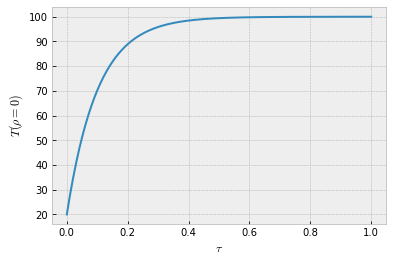

In [7]:
taus = np.linspace(0, 1, num=200)
T_rho_0 = T_eb + (T_0 - T_eb) * np.exp(-np.pi**2 * taus)

fig, ax = plt.subplots()
ax.plot(taus, T_rho_0)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$T(\rho=0)$')

### II B 5 (calcul de la durée de cuisson $\Delta t_2$ pour un oeuf dur)

On peut définir le temps de cuisson $\Delta t_2$ comme le temps où on attend la température $T_c$ au centre.

$$
T(0, \tau_c) = T_c \Leftrightarrow \tau_c = \frac{-1}{\pi^2} \ln \frac{T_c - T_{eb}}{T_0 - T_{eb}} = \Delta t_2 / \theta
$$

D'où 
$$
 \Delta t_2 = -\frac{\theta }{\pi^2} \ln \frac{T_c - T_{eb}}{T_0 - T_{eb}} 
$$

Application numérique :

In [8]:
r2 = 0.025 # m
mu = 1000 # kg / m^3
c = 4180. # J / kg / K 
lambd = 0.6 # W / m / K
theta = r2**2 * mu * c / lambd

theta

4354.166666666668

In [9]:
T_Kelvin = 273.15

T_c = 80 + T_Kelvin
T_0 = 20 + T_Kelvin
T_eb = 100 + T_Kelvin

delta_t2 = - theta / np.pi ** 2 * np.log((T_c - T_eb) / (T_0 - T_eb))

delta_t2

611.5905412287802

On peut convertir en minutes :

In [10]:
print(f"delta_t2: {delta_t2/60:.1f} minutes")

delta_t2: 10.2 minutes


10 minutes pour cuire un oeuf, cela me semble raisonnable.

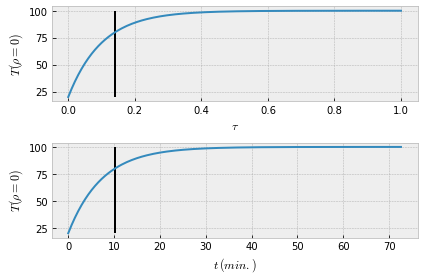

In [11]:
taus = np.linspace(0, 1, num=200)
T_rho_0 = T_eb + (T_0 - T_eb) * np.exp(-np.pi**2 * taus) - T_Kelvin

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(taus, T_rho_0)
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'$T(\rho=0)$')
ax1.vlines(delta_t2 / theta, T_0 - T_Kelvin, T_eb - T_Kelvin)

ax2.plot(taus * theta / 60, T_rho_0)
ax2.set_xlabel(r'$t \, (min.)$')
ax2.set_ylabel(r'$T(\rho=0)$')
ax2.vlines(delta_t2 / 60, T_0 - T_Kelvin, T_eb - T_Kelvin)

plt.tight_layout()